In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import math
import numpy as np
import scipy.stats as sts
import itertools
import sys, os

In [2]:
# necessary functions

def centroid(vertexes):
    """
    find the centroid of a polygon
    """
    _x_list = [vertex [0] for vertex in vertexes]
    _y_list = [vertex [1] for vertex in vertexes]
    _len = len(vertexes)
    _x = sum(_x_list) / _len
    _y = sum(_y_list) / _len
    return(_x, _y)

def calculate_distance(coordinate_1, coordinate_2):
    """
    calculate the distance between two coordinates
    """
    x1 = coordinate_1[0]
    y1 = coordinate_1[1]
    x2 = coordinate_2[0]
    y2 = coordinate_2[1]
    return np.round(math.sqrt((x2 - x1)**2 + (y2 - y1)**2), 2)

def miles_to_dist(miles):
    """
    convert actual distance (in miles) into distance used in this model (coordinate distance)
    """
    return np.round(miles/1.48883375, 2)

def dist_to_miles(distance):
    """
    convert distance used in this model (coordinate distance) into actual distance (in miles)
    """
    return np.round(distance * 1.48883375, 2)

def fuel_mileage(distance):
    """
    calculate how much gas is used for a given distance
    """
    return np.round(distance/5.5, 2)

def get_truncated_normal(mean, sd, low, upp):
    """
    normal distribution with a set range; used for each farm's waste production rate distribution
    """
    return sts.truncnorm((low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

def confidence_interval(data):
    """
    return the 95% confidence interval of the given data
    """
    data_mean = np.mean(data)
    data_std_err = sts.sem(data)
    
    low_CI = data_mean - 1.96 * data_std_err
    high_CI = data_mean + 1.96 * data_std_err
    
    return [np.round(low_CI, 3), np.round(high_CI, 3)]

## Strategy 1: Allocation based on Geographic Area (left vs right area)

### Left area simulation

In [3]:
# respectively, coordinates of Farm 11, 1, 2, 10, 4, 3
left_node_coordinates = ((0, 0), (1, 8), (2, 8), (2, 4), (4, 6), (4, 7))

print("Location of the drop-off site (center of left area):")
print(centroid(left_node_coordinates)) # location of drop-off site of left area

Location of the drop-off site (center of left area):
(2.1666666666666665, 5.5)


In [4]:
# coordinates of each node in the left area

node_11 = (0, 0)
node_1 = (1, 8)
node_2 = (2, 8)
node_10 = (2, 4)
node_4 = (4, 6)
node_3 = (4, 7)

left_dropoff_site = (2.16, 5.5)
left_HQ = (4, 4)

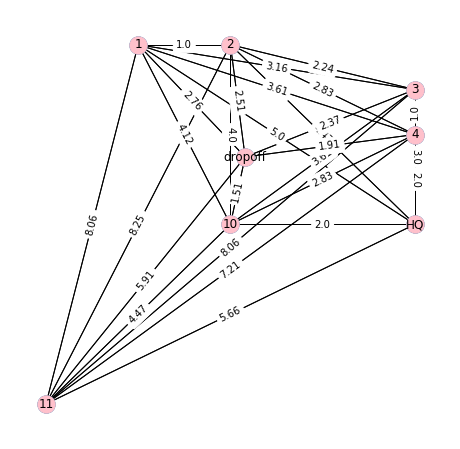

In [5]:
# fully connected graph of the left area

full_left_G=nx.Graph()

# a total of 6 farms, 1 HQ, and 1 drop-off site
full_left_G.add_node(11, pos = node_11)
full_left_G.add_node(1, pos = node_1)
full_left_G.add_node(2, pos = node_2)
full_left_G.add_node(10, pos = node_10)
full_left_G.add_node(4, pos = node_4)
full_left_G.add_node(3, pos = node_3)
full_left_G.add_node('dropoff', pos = left_dropoff_site)
full_left_G.add_node('HQ', pos = left_HQ)

# first, visualize a network with all nodes connected to each other
full_left_G.add_edge(11, 1, weight = calculate_distance(node_11, node_1))
full_left_G.add_edge(11, 2, weight = calculate_distance(node_11, node_2))
full_left_G.add_edge(11, 10, weight = calculate_distance(node_11, node_10))
full_left_G.add_edge(11, 4, weight = calculate_distance(node_11, node_4))
full_left_G.add_edge(11, 3, weight = calculate_distance(node_11, node_3))
full_left_G.add_edge(1, 2, weight = calculate_distance(node_1, node_2))
full_left_G.add_edge(1, 10, weight = calculate_distance(node_1, node_10))
full_left_G.add_edge(1, 4, weight = calculate_distance(node_1, node_4))
full_left_G.add_edge(1, 3, weight = calculate_distance(node_1, node_3))
full_left_G.add_edge(2, 10, weight = calculate_distance(node_2, node_10))
full_left_G.add_edge(2, 4, weight = calculate_distance(node_2, node_4))
full_left_G.add_edge(2, 3, weight = calculate_distance(node_2, node_3))
full_left_G.add_edge(10, 4, weight = calculate_distance(node_10, node_4))
full_left_G.add_edge(10, 3, weight = calculate_distance(node_10, node_3))
full_left_G.add_edge(4, 3, weight = calculate_distance(node_4, node_3))
full_left_G.add_edge('dropoff', 11, weight = calculate_distance(left_dropoff_site, node_11))
full_left_G.add_edge('dropoff', 1, weight = calculate_distance(left_dropoff_site, node_1))
full_left_G.add_edge('dropoff', 2, weight = calculate_distance(left_dropoff_site, node_2))
full_left_G.add_edge('dropoff', 10, weight = calculate_distance(left_dropoff_site, node_10))
full_left_G.add_edge('dropoff', 4, weight = calculate_distance(left_dropoff_site, node_4))
full_left_G.add_edge('dropoff', 3, weight = calculate_distance(left_dropoff_site, node_3))
full_left_G.add_edge('HQ', 11, weight = calculate_distance(left_HQ, node_11))
full_left_G.add_edge('HQ', 1, weight = calculate_distance(left_HQ, node_1))
full_left_G.add_edge('HQ', 2, weight = calculate_distance(left_HQ, node_2))
full_left_G.add_edge('HQ', 10, weight = calculate_distance(left_HQ, node_10))
full_left_G.add_edge('HQ', 4, weight = calculate_distance(left_HQ, node_4))
full_left_G.add_edge('HQ', 3, weight = calculate_distance(left_HQ, node_3))

plt.figure(figsize=(8, 8))
pos=nx.get_node_attributes(full_left_G, 'pos')
labels = nx.get_edge_attributes(full_left_G, 'weight')
nx.draw_networkx(full_left_G,pos)
nx.draw_networkx_edge_labels(full_left_G, pos, edge_labels=labels)
nx.draw(full_left_G, pos, node_color='pink')

In [6]:
# get all possible routes of visiting all 6 farms
left_routes = list(itertools.permutations([1, 2, 3, 4, 10, 11]))

# include HQ as the starting node of every rode since the truck always leaves from HQ
HQ_starting_left_routes = [('HQ', *route) for route in left_routes]

In [7]:
def compute_routes_distance(G, routes):
    """
    compute the total distance to visit all nodes for a particular route
    by summing the distance of a pair of nodes(the starting node and destination node) of each route
    and find the route with the shortest distance
    """
    dist_list = []
    for j in range(len(routes)):
        # the starting node and destination node
        node_route = [(routes[j][i],routes[j][i+1]) for i in range(0, len(routes[j])-1, 1)]

        dist = []
        for i in range(len(node_route)):
            n1 = node_route[i][0] # starting node
            n2 = node_route[i][1] # destination node
            dist.append(G.get_edge_data(n1, n2))
            
        # sum the distance of the starting & destination node pair
        dist_list.append(sum(item['weight'] for item in dist))
    
    # find the route with the shortest distance
    return dist_list.index(min(dist_list)), min(dist_list)

min_index, min_dist = compute_routes_distance(full_left_G, HQ_starting_left_routes)

print(f"{HQ_starting_left_routes[min_index]} is the fastest route, with distance {min_dist}")

('HQ', 4, 3, 2, 1, 10, 11) is the fastest route, with distance 14.829999999999998


Since we found the route with the shortest distance, assume the truck visits each farm only in this particular sequence: (4-3-2-1-10-11). While every farm is connected to the waste drop-off site and company HQ, it is only connected to its previous or following farms within the route.

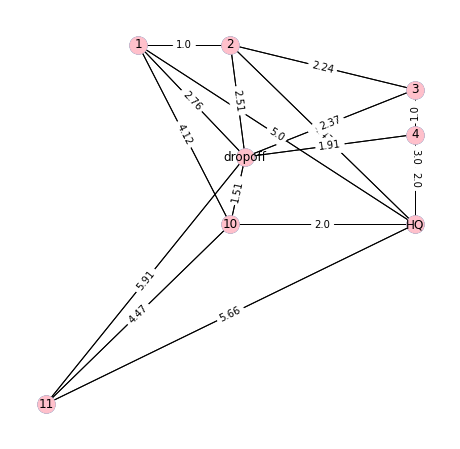

In [8]:
# graph of the left area with edges based on shortest route found above

left_G=nx.Graph()

# node attributes: coordinate position & amount of waste
left_G.add_node(11, pos = node_11, waste=0)
left_G.add_node(1, pos = node_1, waste=0)
left_G.add_node(2, pos = node_2, waste=0)
left_G.add_node(10, pos = node_10, waste=0)
left_G.add_node(4, pos = node_4, waste=0)
left_G.add_node(3, pos = node_3, waste=0)
left_G.add_node('dropoff', pos = left_dropoff_site, waste=0)
left_G.add_node('HQ', pos = left_HQ, waste=0)

# re-adjust the edges so that every farm is connected to the drop-off site and HQ
# but only with its previous or following farms within the route
left_G.add_edge(11, 10, weight = calculate_distance(node_11, node_10))
left_G.add_edge(1, 2, weight = calculate_distance(node_1, node_2))
left_G.add_edge(2, 3, weight = calculate_distance(node_2, node_3))
left_G.add_edge(10, 1, weight = calculate_distance(node_10, node_1))
left_G.add_edge(4, 3, weight = calculate_distance(node_4, node_3))
left_G.add_edge('dropoff', 11, weight = calculate_distance(left_dropoff_site, node_11))
left_G.add_edge('dropoff', 1, weight = calculate_distance(left_dropoff_site, node_1))
left_G.add_edge('dropoff', 2, weight = calculate_distance(left_dropoff_site, node_2))
left_G.add_edge('dropoff', 10, weight = calculate_distance(left_dropoff_site, node_10))
left_G.add_edge('dropoff', 4, weight = calculate_distance(left_dropoff_site, node_4))
left_G.add_edge('dropoff', 3, weight = calculate_distance(left_dropoff_site, node_3))
left_G.add_edge('HQ', 11, weight = calculate_distance(left_HQ, node_11))
left_G.add_edge('HQ', 1, weight = calculate_distance(left_HQ, node_1))
left_G.add_edge('HQ', 2, weight = calculate_distance(left_HQ, node_2))
left_G.add_edge('HQ', 10, weight = calculate_distance(left_HQ, node_10))
left_G.add_edge('HQ', 4, weight = calculate_distance(left_HQ, node_4))
left_G.add_edge('HQ', 3, weight = calculate_distance(left_HQ, node_3))

plt.figure(figsize=(8, 8))
pos=nx.get_node_attributes(left_G, 'pos')
labels = nx.get_edge_attributes(left_G, 'weight')
nx.draw_networkx(left_G, pos)
nx.draw_networkx_edge_labels(left_G, pos, edge_labels=labels)
nx.draw(left_G, pos, node_color='pink')

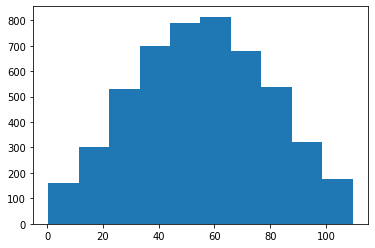

In [9]:
# example of daily waste production distribution of Farm 1
farm_1 = get_truncated_normal(54.8, 27.4, 0, 109.6)
plt.hist(farm_1.rvs(size=5000))
plt.show()

In [10]:
class HiddenPrints:
    """
    This class allows us to enable/disable print functions.
    Retrieved from https://stackoverflow.com/questions/8391411/how-to-block-calls-to-print
    """
    def __enter__(self):
        self._original_stdout = sys.stdout
        sys.stdout = open(os.devnull, 'w')

    def __exit__(self, exc_type, exc_val, exc_tb):
        sys.stdout.close()
        sys.stdout = self._original_stdout

In [11]:
class Truck:
    """
    This class creates a truck object.
    
    Inputs:
    
        gas_threshold(float): gas refuel threshold of the truck.
    
        current_fuel(float): the amount of gas the truck currently has. Default: 35 (maximum fuel).
        
        current_capacity(float): the amount of waste the truck currently has. Default: 0 (initial capacity).
        
        max_capacity(float): the maximum amount of waste a truck can load. Default: 14000.
    """
    
    def __init__(self, gas_threshold, current_fuel=35, current_capacity=0, max_capacity=14000):
        self.gas_threshold = gas_threshold
        self.current_fuel = current_fuel
        self.current_capacity = current_capacity
        self.max_capacity = max_capacity
        self.position = 'HQ' # initial position is the company HQ
        self.moved_distance = 0 # total distance that the truck moved
    
    def check_fuel(self):
        """
        Check whether the truck has enough gas depending on the gas threshold.
        """
        if self.current_fuel < self.gas_threshold:
            self.refuel = True
        else:
            self.refuel = False
            
    def check_capacity(self):
        """
        Check whether the truck's load capacity is full or not.
        """
        if self.current_capacity >= self.max_capacity:
            self.drop_off = True
        else:
            self.drop_off = False
        
            
class Strategy1_Left:
    """
    This class implements the simulation of the left area of the first strategy.
    """
    
    def __init__(self, truck_route):
        
        # waste production rates for each farm in the left area
        self.node1_waste = get_truncated_normal(mean=54.8, sd=27.4, low=0, upp=109.6)
        self.node2_waste = get_truncated_normal(mean=34.3, sd=17.13, low=0, upp=68.5)
        self.node3_waste = get_truncated_normal(mean=20.6, sd=10.28, low=0, upp=41.1)
        self.node4_waste = get_truncated_normal(mean=17.8, sd=8.91, low=0, upp=35.6)
        self.node10_waste = get_truncated_normal(mean=20.6, sd=10.28, low=0, upp=41.1)
        self.node11_waste = get_truncated_normal(mean=68.5, sd=34.25, low=0, upp=137)
        
        self.graph = left_G # network graph representing the left area
        self.day = 0  # keep track of day
        self.fuel_spent = 0 # keep track of fuel spent
        self.fuel_cost = 0 # keep track of how much we spend on fuel
        self.fuel_price_dist = sts.norm(6.13, 0.57) # fuel price distribution
        
        self.truck = Truck(gas_threshold=2) # create a truck with a gas threshold of 2 gallons
        self.truck_route = truck_route # the fixed optimal route that the truck will visit
    
    def update(self):
        
        # count every day; each update is a daily update
        self.day += 1
        
        # daily fuel price
        self.daily_fuel_price = self.fuel_price_dist.rvs()
        
        # waste is produced every day
        self.graph.nodes[1]['waste'] += self.node1_waste.rvs()
        self.graph.nodes[2]['waste'] += self.node2_waste.rvs()
        self.graph.nodes[3]['waste'] += self.node3_waste.rvs()
        self.graph.nodes[4]['waste'] += self.node4_waste.rvs()
        self.graph.nodes[10]['waste'] += self.node10_waste.rvs()
        self.graph.nodes[11]['waste'] += self.node11_waste.rvs()
        
        print(f"----------------DAY {self.day}----------------")
        
        # the truck operates to collect waste every 32 days
        if self.day % 32 == 0: 
        
            print(f"Truck is at {self.truck.position}.")
            
            # keep track of the nodes that the truck moves from and to
            # the first node the truck is at is always the company HQ
            truck_visits = ['HQ'] 

            for destination in self.truck_route: # [4, 3, 2, 1, 10, 11, 'HQ']
                
                self.truck.check_fuel() # gas check
                self.truck.check_capacity() # truck capacity check

                if self.truck.refuel != True: # if the truck does not need to refuel
                    if self.truck.drop_off != True: # and if the truck does not need to drop off waste
                        self.truck.position = destination
                        
                        self.truck.current_capacity += self.graph.nodes[destination]['waste'] # load waste
                        print(f"Truck is collecting waste. Accumulated waste in truck: {self.truck.current_capacity}")
                        self.graph.nodes[destination]['waste'] = 0 # empty waste at farm

                    else: # if the truck needs to drop off waste, go to waste drop-off site
                        print("Truck is dropping off dump.")
                        self.truck.position = 'dropoff'
                        self.truck.current_capacity = 0 # empty waste in truck


                else: # if the truck needs to refuel, go to HQ
                    print("Truck is refueling.")
                    self.truck.position = 'HQ'
                    self.truck.current_fuel = 35 # refuel up to maximum fuel capacity
                    self.fuel_cost += self.daily_fuel_price * 35 # keep track of how much we spend on fuel

                print(f"Truck is at {self.truck.position}")
                truck_visits.append(self.truck.position)

                # keep track of only two nodes: where the truck came from and where the truck is going
                # to calculate the distance the truck moved between these two nodes
                if len(truck_visits) > 2:
                    truck_visits.pop(0) 

                from_node = truck_visits[0] # where the truck came from 
                to_node = truck_visits[1] # where the truck is going
                
                # distance between the two nodes (i.e. how much the truck moved)
                dist = calculate_distance(self.graph.nodes[from_node]['pos'], self.graph.nodes[to_node]['pos'])
                
                self.truck.current_fuel -= fuel_mileage(dist) # subtract the amount of fuel used
                self.truck.moved_distance += dist # keep track of how much the truck moved in total
                self.fuel_spent += fuel_mileage(dist) # keep track of gas used in total

    def return_moved_distance(self):
        return self.truck.moved_distance
    
    def return_fuel_spent(self):
        return self.fuel_spent
    
    def return_fuel_cost(self):
        return self.fuel_cost

**Test**: Test whether codes work as intended by printing key changes and events.


The test works as expected. Here are some examples:
- the truck operates every 32 days
- the truck visits all farms within the left area to collect waste
- the truck visits the drop-off site when the capacity is full
- the truck refuels at HQ when it is out of gas
- the truck returns to HQ as the final destination

In [12]:
# test simulation

# last destination is 'HQ' because it must return to HQ
test_left_sim = Strategy1_Left([4, 3, 2, 1, 10, 11, 'HQ']) 
for i in range(100): # results for 100 days
    test_left_sim.update()

----------------DAY 1----------------
----------------DAY 2----------------
----------------DAY 3----------------
----------------DAY 4----------------
----------------DAY 5----------------
----------------DAY 6----------------
----------------DAY 7----------------
----------------DAY 8----------------
----------------DAY 9----------------
----------------DAY 10----------------
----------------DAY 11----------------
----------------DAY 12----------------
----------------DAY 13----------------
----------------DAY 14----------------
----------------DAY 15----------------
----------------DAY 16----------------
----------------DAY 17----------------
----------------DAY 18----------------
----------------DAY 19----------------
----------------DAY 20----------------
----------------DAY 21----------------
----------------DAY 22----------------
----------------DAY 23----------------
----------------DAY 24----------------
----------------DAY 25----------------
----------------DAY 26------------

**Results**: 500 simulation trials of truck operation for 1 year

In [13]:
n_trials = 500

strat1_left_distance_results = []
strat1_left_fuel_spent_results = []
strat1_left_fuel_cost_results = []

for i in range(n_trials):
    # last destination is 'HQ' because it must return to HQ
    sim = Strategy1_Left([4, 3, 2, 1, 10, 11, 'HQ']) 
    for j in range(365): # results for one year
        with HiddenPrints(): # disable printing
            sim.update()
    strat1_left_distance_results.append(sim.return_moved_distance())
    strat1_left_fuel_spent_results.append(sim.return_fuel_spent())
    strat1_left_fuel_cost_results.append(sim.return_fuel_cost())

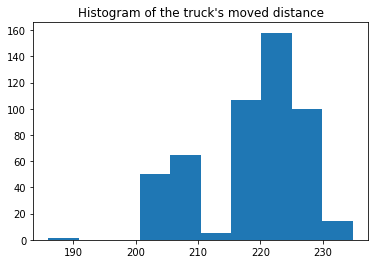

Average moved distance per year: 219.486
95% confidence interval: [218.751, 220.22]


In [15]:
# the distance the truck moved
plt.hist(strat1_left_distance_results)
plt.title("Histogram of the truck's moved distance")
plt.show()
print(f"Average moved distance per year: {np.round(np.mean(strat1_left_distance_results), 3)}")
print(f"95% confidence interval: {confidence_interval(strat1_left_distance_results)}")

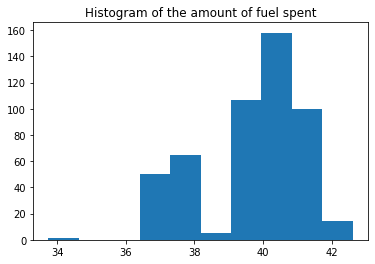

Average fuel spent per year: 39.833
95% confidence interval: [39.699, 39.967]


In [16]:
# the amount of fuel spent by the truck (proportional to the distance moved)
plt.hist(strat1_left_fuel_spent_results)
plt.title("Histogram of the amount of fuel spent")
plt.show()
print(f"Average fuel spent per year: {np.round(np.mean(strat1_left_fuel_spent_results), 3)}")
print(f"95% confidence interval: {confidence_interval(strat1_left_fuel_spent_results)}")

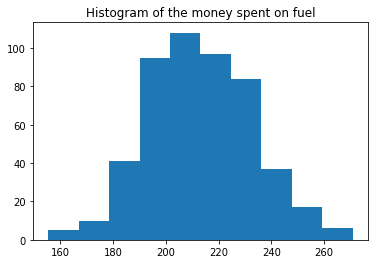

Average money spent on fuel per year: 213.336
95% confidence interval: [211.606, 215.067]


In [17]:
# the amount of money spent on fuel
plt.hist(strat1_left_fuel_cost_results)
plt.title("Histogram of the money spent on fuel")
plt.show()
print(f"Average money spent on fuel per year: {np.round(np.mean(strat1_left_fuel_cost_results), 3)}")
print(f"95% confidence interval: {confidence_interval(strat1_left_fuel_cost_results)}")

### Right area simulation

In [18]:
# respectively, coordinates of Farm 5, 6, 7, 8, 9
right_node_coordinates = ((0, 6), (0.5, 5), (1, 4.5), (3, 6), (4, 3))

print("Location of the drop-off site (center of right area):")
print(centroid(right_node_coordinates)) # location of drop-off site of right area

Location of the drop-off site (center of right area):
(1.7, 4.9)


In [19]:
# coordinates of each node in the right area

node_5 = (0, 6)
node_6 = (0.5, 5)
node_7 = (1, 4.5)
node_8 = (3, 6)
node_9 = (4, 3)

right_dropoff_site = (1.7, 4.9)
right_HQ = (0, 4)

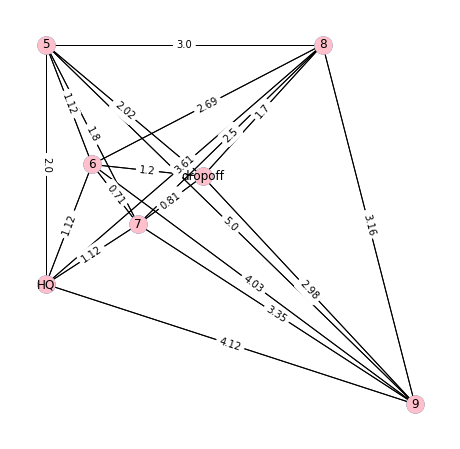

In [20]:
# fully connected graph of the right area

full_right_G=nx.Graph()

# a total of 5 farms, 1 HQ, and 1 drop-off site
full_right_G.add_node(5, pos = node_5)
full_right_G.add_node(6, pos = node_6)
full_right_G.add_node(7, pos = node_7)
full_right_G.add_node(8, pos = node_8)
full_right_G.add_node(9, pos = node_9)
full_right_G.add_node('dropoff', pos = right_dropoff_site)
full_right_G.add_node('HQ', pos = right_HQ)

# first, visualize a network with all nodes connected to each other
full_right_G.add_edge(5, 6, weight = calculate_distance(node_5, node_6))
full_right_G.add_edge(5, 7, weight = calculate_distance(node_5, node_7))
full_right_G.add_edge(5, 8, weight = calculate_distance(node_5, node_8))
full_right_G.add_edge(5, 9, weight = calculate_distance(node_5, node_9))
full_right_G.add_edge(6, 7, weight = calculate_distance(node_6, node_7))
full_right_G.add_edge(6, 8, weight = calculate_distance(node_6, node_8))
full_right_G.add_edge(6, 9, weight = calculate_distance(node_6, node_9))
full_right_G.add_edge(7, 8, weight = calculate_distance(node_7, node_8))
full_right_G.add_edge(7, 9, weight = calculate_distance(node_7, node_9))
full_right_G.add_edge(8, 9, weight = calculate_distance(node_8, node_9))
full_right_G.add_edge('dropoff', 5, weight = calculate_distance(right_dropoff_site, node_5))
full_right_G.add_edge('dropoff', 6, weight = calculate_distance(right_dropoff_site, node_6))
full_right_G.add_edge('dropoff', 7, weight = calculate_distance(right_dropoff_site, node_7))
full_right_G.add_edge('dropoff', 8, weight = calculate_distance(right_dropoff_site, node_8))
full_right_G.add_edge('dropoff', 9, weight = calculate_distance(right_dropoff_site, node_9))
full_right_G.add_edge('HQ', 5, weight = calculate_distance(right_HQ, node_5))
full_right_G.add_edge('HQ', 6, weight = calculate_distance(right_HQ, node_6))
full_right_G.add_edge('HQ', 7, weight = calculate_distance(right_HQ, node_7))
full_right_G.add_edge('HQ', 8, weight = calculate_distance(right_HQ, node_8))
full_right_G.add_edge('HQ', 9, weight = calculate_distance(right_HQ, node_9))

plt.figure(figsize=(8, 8))
pos=nx.get_node_attributes(full_right_G, 'pos')
labels = nx.get_edge_attributes(full_right_G, 'weight')
nx.draw_networkx(full_right_G, pos)
nx.draw_networkx_edge_labels(full_right_G, pos, edge_labels=labels)
nx.draw(full_right_G, pos, node_color='pink')

In [21]:
# get all possible routes of visiting all 5 farms
right_routes = list(itertools.permutations([5, 6, 7, 8, 9]))

# include HQ as the starting node of every rode since the truck always leaves from HQ
HQ_starting_right_routes = [('HQ', *route) for route in right_routes]

# find the shortest route visiting all 5 farms
min_index, min_dist = compute_routes_distance(full_right_G, HQ_starting_right_routes)

print(f"{HQ_starting_right_routes[min_index]} is the fastest route, with distance {min_dist}")

('HQ', 7, 6, 5, 8, 9) is the fastest route, with distance 9.11


Since we found the route with the shortest distance, assume the truck visits each farm only in this particular sequence: (7-6-5-8-9). While every farm is connected to the waste drop-off site and company HQ, it is only connected to its previous or following farms within the route.

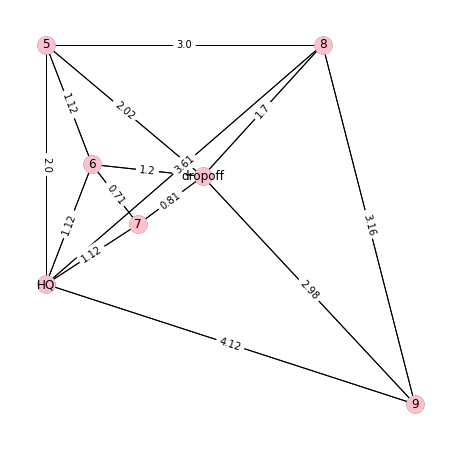

In [22]:
# graph of the right area with edges based on shortest route found above

right_G=nx.Graph()

# node attributes: coordinate position & amount of waste
right_G.add_node(5, pos = node_5, waste=0)
right_G.add_node(6, pos = node_6, waste=0)
right_G.add_node(7, pos = node_7, waste=0)
right_G.add_node(8, pos = node_8, waste=0)
right_G.add_node(9, pos = node_9, waste=0)
right_G.add_node('dropoff', pos = right_dropoff_site, waste=0)
right_G.add_node('HQ', pos = right_HQ, waste=0)

# re-adjust the edges so that every farm is connected to the drop-off site and HQ
# but only with its previous or following farms within the route
right_G.add_edge(7, 6, weight = calculate_distance(node_7, node_6))
right_G.add_edge(6, 5, weight = calculate_distance(node_6, node_5))
right_G.add_edge(5, 8, weight = calculate_distance(node_5, node_8))
right_G.add_edge(8, 9, weight = calculate_distance(node_8, node_9))
right_G.add_edge('dropoff', 5, weight = calculate_distance(right_dropoff_site, node_5))
right_G.add_edge('dropoff', 6, weight = calculate_distance(right_dropoff_site, node_6))
right_G.add_edge('dropoff', 7, weight = calculate_distance(right_dropoff_site, node_7))
right_G.add_edge('dropoff', 8, weight = calculate_distance(right_dropoff_site, node_8))
right_G.add_edge('dropoff', 9, weight = calculate_distance(right_dropoff_site, node_9))
right_G.add_edge('HQ', 5, weight = calculate_distance(right_HQ, node_5))
right_G.add_edge('HQ', 6, weight = calculate_distance(right_HQ, node_6))
right_G.add_edge('HQ', 7, weight = calculate_distance(right_HQ, node_7))
right_G.add_edge('HQ', 8, weight = calculate_distance(right_HQ, node_8))
right_G.add_edge('HQ', 9, weight = calculate_distance(right_HQ, node_9))

plt.figure(figsize=(8, 8))
pos=nx.get_node_attributes(right_G, 'pos')
labels = nx.get_edge_attributes(right_G, 'weight')
nx.draw_networkx(right_G, pos)
nx.draw_networkx_edge_labels(right_G, pos, edge_labels=labels)
nx.draw(right_G, pos, node_color='pink')

In [23]:
class Strategy1_Right:
    """
    This class implements the simulation of the right area of the first strategy.
    """
    
    def __init__(self, truck_route):
        
        # waste production rates for each farm in the right area
        self.node5_waste = get_truncated_normal(mean=41.1, sd=20.55, low=0, upp=82.2)
        self.node6_waste = get_truncated_normal(mean=27.4, sd=13.7, low=0, upp=54.8)
        self.node7_waste = get_truncated_normal(mean=438.4, sd=219.2, low=0, upp=876.8)
        self.node8_waste = get_truncated_normal(mean=137, sd=68.5, low=0, upp=274)
        self.node9_waste = get_truncated_normal(mean=1219.3, sd=609.65, low=0, upp=2438.6)
        
        self.graph = right_G # network graph representing the right area
        self.day = 0  # keep track of day
        self.fuel_spent = 0 # keep track of fuel spent
        self.fuel_cost = 0 # keep track of how much we spend on fuel
        self.fuel_price_dist = sts.norm(6.13, 0.57) # fuel price distribution
        
        self.truck = Truck(gas_threshold=1.5) # create a truck with a gas threshold of 1.5 gallons
        self.truck_route = truck_route # the fixed optimal route that the truck will visit
        

    def update(self):
        # count every day; each update is a daily update
        self.day += 1
        
        # daily fuel price
        self.daily_fuel_price = self.fuel_price_dist.rvs()
        
        # waste is produced every day
        self.graph.nodes[5]['waste'] += self.node5_waste.rvs()
        self.graph.nodes[6]['waste'] += self.node6_waste.rvs()
        self.graph.nodes[7]['waste'] += self.node7_waste.rvs()
        self.graph.nodes[8]['waste'] += self.node8_waste.rvs()
        self.graph.nodes[9]['waste'] += self.node9_waste.rvs()
        
        print(f"----------------DAY {self.day}----------------")
        
        # the truck operates to collect waste every 3 days
        if self.day % 3 == 0: 
        
            print(f"Truck is at {self.truck.position}.")
            
            # keep track of the nodes that the truck moves from and to
            # the first node the truck is at is always the company HQ
            truck_visits = ['HQ'] 

            for destination in self.truck_route: # [7, 6, 5, 8, 9, 'HQ']
                
                self.truck.check_fuel() # gas check
                self.truck.check_capacity() # truck capacity check

                if self.truck.refuel != True: # if the truck does not need to refuel
                    if self.truck.drop_off != True: # and if the truck does not need to drop off waste
                        self.truck.position = destination
                        
                        self.truck.current_capacity += self.graph.nodes[destination]['waste'] # load waste
                        print(f"Truck is collecting waste. Accumulated waste in truck: {self.truck.current_capacity}")
                        self.graph.nodes[destination]['waste'] = 0 # empty waste at farm

                    else: # if the truck needs to drop off waste, go to waste drop-off site
                        print("Truck is dropping off dump.")
                        self.truck.position = 'dropoff'
                        self.truck.current_capacity = 0 # empty waste in truck


                else: # if the truck needs to refuel, go to HQ
                    print("Truck is refueling.")
                    self.truck.position = 'HQ'
                    self.truck.current_fuel = 35 # refuel up to maximum fuel capacity
                    self.fuel_cost += self.daily_fuel_price * 35 # keep track of how much we spend on fuel

                print(f"Truck is at {self.truck.position}")
                truck_visits.append(self.truck.position)

                # keep track of only two nodes: where the truck came from and where the truck is going
                # to calculate the distance the truck moved between these two nodes
                if len(truck_visits) > 2:
                    truck_visits.pop(0) 

                from_node = truck_visits[0] # where the truck came from 
                to_node = truck_visits[1] # where the truck is going
                
                # distance between the two nodes (i.e. how much the truck moved)
                dist = calculate_distance(self.graph.nodes[from_node]['pos'], self.graph.nodes[to_node]['pos'])
                
                self.truck.current_fuel -= fuel_mileage(dist) # subtract gas used
                self.truck.moved_distance += dist # keep track of how much the truck moved in total
                self.fuel_spent += fuel_mileage(dist) # keep track of gas used in total

    def return_moved_distance(self):
        return self.truck.moved_distance
    
    def return_fuel_spent(self):
        return self.fuel_spent
    
    def return_fuel_cost(self):
        return self.fuel_cost

**Test**: Test whether codes work as intended by printing key changes and events.


The test works as expected. Here are some examples:
- the truck operates every 3 days
- the truck visits all farms within the right area to collect waste
- the truck visits the drop-off site when the capacity is full
- the truck refuels at HQ when it is out of gas
- the truck returns to HQ as the final destination

In [24]:
# test simulation

# last destination is 'HQ' because it must return to HQ
test_right_sim = Strategy1_Right([7, 6, 5, 8, 9, 'HQ']) 
for i in range(100): # results for 100 days
    test_right_sim.update()

----------------DAY 1----------------
----------------DAY 2----------------
----------------DAY 3----------------
Truck is at HQ.
Truck is collecting waste. Accumulated waste in truck: 1476.5738071595506
Truck is at 7
Truck is collecting waste. Accumulated waste in truck: 1591.5367122392277
Truck is at 6
Truck is collecting waste. Accumulated waste in truck: 1731.7723269567991
Truck is at 5
Truck is collecting waste. Accumulated waste in truck: 2243.0996920652287
Truck is at 8
Truck is collecting waste. Accumulated waste in truck: 6380.423560255898
Truck is at 9
Truck is collecting waste. Accumulated waste in truck: 6380.423560255898
Truck is at HQ
----------------DAY 4----------------
----------------DAY 5----------------
----------------DAY 6----------------
Truck is at HQ.
Truck is collecting waste. Accumulated waste in truck: 7646.95998952566
Truck is at 7
Truck is collecting waste. Accumulated waste in truck: 7727.34934309551
Truck is at 6
Truck is collecting waste. Accumulated wa

**Results**: 500 simulation trials of truck operation for 1 year

In [25]:
n_trials = 500

strat1_right_distance_results = []
strat1_right_fuel_spent_results = []
strat1_right_fuel_cost_results = []

for i in range(n_trials):
    # last destination is 'HQ' because it must return to HQ
    sim = Strategy1_Right([7, 6, 5, 8, 9, 'HQ']) 
    for j in range(365): # results for one year
        with HiddenPrints(): # disable printing
            sim.update()
    strat1_right_distance_results.append(sim.return_moved_distance())
    strat1_right_fuel_spent_results.append(sim.return_fuel_spent())
    strat1_right_fuel_cost_results.append(sim.return_fuel_cost())

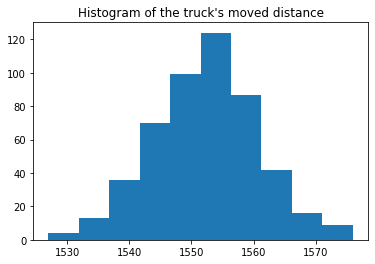

Average moved distance per year: 1552.286
95% confidence interval: [1551.541, 1553.031]


In [26]:
# the distance the truck moved
plt.hist(strat1_right_distance_results)
plt.title("Histogram of the truck's moved distance")
plt.show()
print(f"Average moved distance per year: {np.round(np.mean(strat1_right_distance_results), 3)}")
print(f"95% confidence interval: {confidence_interval(strat1_right_distance_results)}")

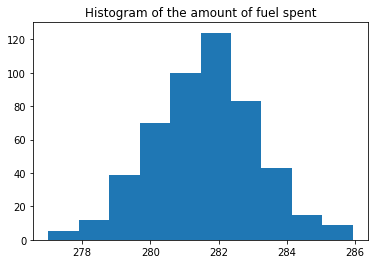

Average fuel spent per year: 281.587
95% confidence interval: [281.451, 281.723]


In [27]:
# the amount of fuel spent by the truck (proportional to the distance moved)
plt.hist(strat1_right_fuel_spent_results)
plt.title("Histogram of the amount of fuel spent")
plt.show()
print(f"Average fuel spent per year: {np.round(np.mean(strat1_right_fuel_spent_results), 3)}")
print(f"95% confidence interval: {confidence_interval(strat1_right_fuel_spent_results)}")

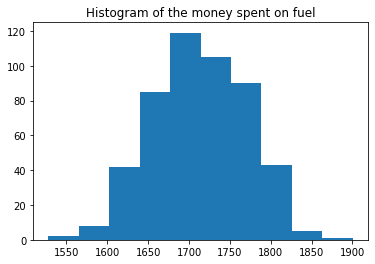

Average money spent on fuel per year: 1713.757
95% confidence interval: [1708.752, 1718.762]


In [28]:
# the amount of money spent on fuel
plt.hist(strat1_right_fuel_cost_results)
plt.title("Histogram of the money spent on fuel")
plt.show()
print(f"Average money spent on fuel per year: {np.round(np.mean(strat1_right_fuel_cost_results), 3)}")
print(f"95% confidence interval: {confidence_interval(strat1_right_fuel_cost_results)}")

### Simulating left & right area simultaneously

In [48]:
n_trials = 500

strat1_distance_results = []
strat1_fuel_spent_results = []
strat1_fuel_cost_results = []

for i in range(n_trials):
    # last destination is 'HQ' because it must return to HQ
    left_sim = Strategy1_Left([4, 3, 2, 1, 10, 11, 'HQ']) 
    right_sim = Strategy1_Right([7, 6, 5, 8, 9, 'HQ']) 
    for j in range(365): # results for one year
        with HiddenPrints(): # disable printing
            left_sim.update()
            right_sim.update()
    strat1_distance_results.append(left_sim.return_moved_distance() + right_sim.return_moved_distance())
    strat1_fuel_spent_results.append(left_sim.return_fuel_spent() + right_sim.return_fuel_spent())
    strat1_fuel_cost_results.append(left_sim.return_fuel_cost() + right_sim.return_fuel_cost())

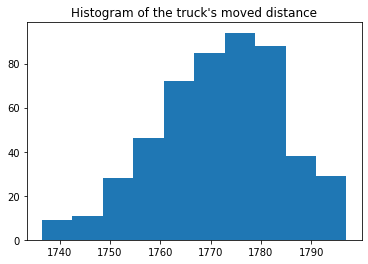

Average moved distance per year: 1771.738
95% confidence interval: [1770.661, 1772.816]


In [49]:
# the distance the truck moved
plt.hist(strat1_distance_results)
plt.title("Histogram of the truck's moved distance")
plt.show()
print(f"Average moved distance per year: {np.round(np.mean(strat1_distance_results), 3)}")
print(f"95% confidence interval: {confidence_interval(strat1_distance_results)}")

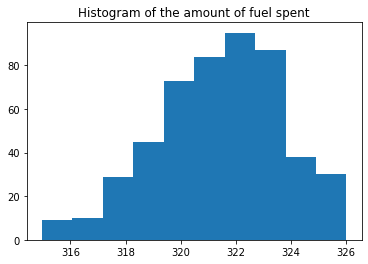

Average fuel spent per year: 321.417
95% confidence interval: [321.22, 321.613]


In [51]:
# the amount of fuel spent by the truck (proportional to the distance moved)
plt.hist(strat1_fuel_spent_results)
plt.title("Histogram of the amount of fuel spent")
plt.show()
print(f"Average fuel spent per year: {np.round(np.mean(strat1_fuel_spent_results), 3)}")
print(f"95% confidence interval: {confidence_interval(strat1_fuel_spent_results)}")

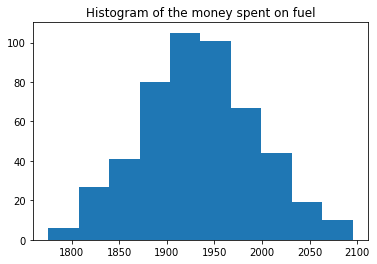

Average money spent on fuel per year: 1933.142
95% confidence interval: [1927.908, 1938.375]


In [52]:
# the amount of money spent on fuel
plt.hist(strat1_fuel_cost_results)
plt.title("Histogram of the money spent on fuel")
plt.show()
print(f"Average money spent on fuel per year: {np.round(np.mean(strat1_fuel_cost_results), 3)}")
print(f"95% confidence interval: {confidence_interval(strat1_fuel_cost_results)}")

## Strategy 2: Allocation based on Waste Production

In [29]:
# coordinates of farms

node_1 = (1, 8)
node_2 = (2.1, 7.9)
node_3 = (3.6, 7)
node_4 = (3.8, 6.2)
node_5 = (4.2, 6)
node_6 = (4.5, 5)
node_7 = (5.2, 4.6)
node_8 = (7, 5.9)
node_9 = (8, 3.2)
node_10 = (2, 4.2)
node_11 = (0, 0)

# group farms by sizes
big_farms = (node_7, node_8, node_9)
small_farms = (node_1, node_2, node_3, node_4, node_5, node_6, node_10, node_11)

In [30]:
# find coordinate positions of the HQ and drop-off site

print(f"The centroid of the big farms: {np.round(centroid(big_farms), 2)}. This is the location of the HQ.")
print(f"The centroid of the small farms: {np.round(centroid(small_farms), 2)}.")
print(f"The drop-off site is in the middle of the two centroids: \
({np.round(np.mean((centroid(big_farms)[0], centroid(small_farms)[0])), 2)}, \
{np.round(np.mean((centroid(big_farms)[1], centroid(small_farms)[1])), 2)}).")

The centroid of the big farms: [6.73 4.57]. This is the location of the HQ.
The centroid of the small farms: [2.65 5.54].
The drop-off site is in the middle of the two centroids: (4.69, 5.05).


In [31]:
dropoff_site = (4.69, 5.05)
HQ = (6.73, 4.57)

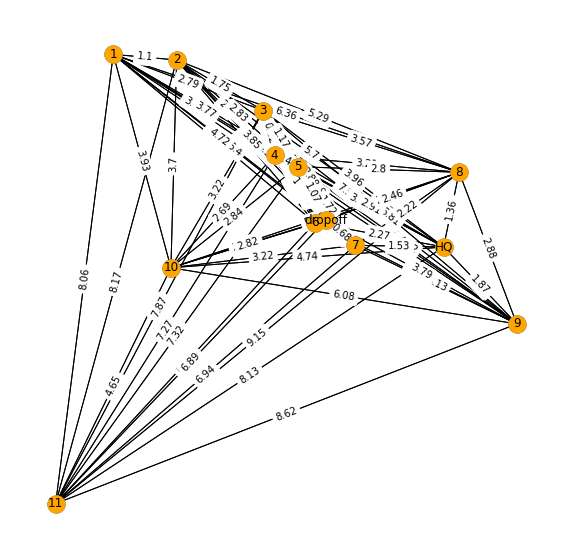

In [32]:
# fully connected graph

full_G=nx.Graph()

# a total of 11 farms, 1 HQ, and 1 drop-off site
full_G.add_node(1, pos = node_1)
full_G.add_node(2, pos = node_2)
full_G.add_node(3, pos = node_3)
full_G.add_node(4, pos = node_4)
full_G.add_node(5, pos = node_5)
full_G.add_node(6, pos = node_6)
full_G.add_node(7, pos = node_7)
full_G.add_node(8, pos = node_8)
full_G.add_node(9, pos = node_9)
full_G.add_node(10, pos = node_10)
full_G.add_node(11, pos = node_11)
full_G.add_node('dropoff', pos = dropoff_site)
full_G.add_node('HQ', pos = HQ)

# first, visualize a network with all nodes connected to each other
full_G.add_edge(1, 2, weight = calculate_distance(node_1, node_2))
full_G.add_edge(1, 3, weight = calculate_distance(node_1, node_3))
full_G.add_edge(1, 4, weight = calculate_distance(node_1, node_4))
full_G.add_edge(1, 5, weight = calculate_distance(node_1, node_5))
full_G.add_edge(1, 6, weight = calculate_distance(node_1, node_6))
full_G.add_edge(1, 7, weight = calculate_distance(node_1, node_7))
full_G.add_edge(1, 8, weight = calculate_distance(node_1, node_8))
full_G.add_edge(1, 9, weight = calculate_distance(node_1, node_9))
full_G.add_edge(1, 10, weight = calculate_distance(node_1, node_10))
full_G.add_edge(1, 11, weight = calculate_distance(node_1, node_11))

full_G.add_edge(2, 3, weight = calculate_distance(node_2, node_3))
full_G.add_edge(2, 4, weight = calculate_distance(node_2, node_4))
full_G.add_edge(2, 5, weight = calculate_distance(node_2, node_5))
full_G.add_edge(2, 6, weight = calculate_distance(node_2, node_6))
full_G.add_edge(2, 7, weight = calculate_distance(node_2, node_7))
full_G.add_edge(2, 8, weight = calculate_distance(node_2, node_8))
full_G.add_edge(2, 9, weight = calculate_distance(node_2, node_9))
full_G.add_edge(2, 10, weight = calculate_distance(node_2, node_10))
full_G.add_edge(2, 11, weight = calculate_distance(node_2, node_11))

full_G.add_edge(3, 4, weight = calculate_distance(node_3, node_4))
full_G.add_edge(3, 5, weight = calculate_distance(node_3, node_5))
full_G.add_edge(3, 6, weight = calculate_distance(node_3, node_6))
full_G.add_edge(3, 7, weight = calculate_distance(node_3, node_7))
full_G.add_edge(3, 8, weight = calculate_distance(node_3, node_8))
full_G.add_edge(3, 9, weight = calculate_distance(node_3, node_9))
full_G.add_edge(3, 10, weight = calculate_distance(node_3, node_10))
full_G.add_edge(3, 11, weight = calculate_distance(node_3, node_11))

full_G.add_edge(4, 5, weight = calculate_distance(node_4, node_5))
full_G.add_edge(4, 6, weight = calculate_distance(node_4, node_6))
full_G.add_edge(4, 7, weight = calculate_distance(node_4, node_7))
full_G.add_edge(4, 8, weight = calculate_distance(node_4, node_8))
full_G.add_edge(4, 9, weight = calculate_distance(node_4, node_9))
full_G.add_edge(4, 10, weight = calculate_distance(node_4, node_10))
full_G.add_edge(4, 11, weight = calculate_distance(node_4, node_11))

full_G.add_edge(5, 6, weight = calculate_distance(node_5, node_6))
full_G.add_edge(5, 7, weight = calculate_distance(node_5, node_7))
full_G.add_edge(5, 8, weight = calculate_distance(node_5, node_8))
full_G.add_edge(5, 9, weight = calculate_distance(node_5, node_9))
full_G.add_edge(5, 10, weight = calculate_distance(node_5, node_10))
full_G.add_edge(5, 11, weight = calculate_distance(node_5, node_11))

full_G.add_edge(6, 7, weight = calculate_distance(node_6, node_7))
full_G.add_edge(6, 8, weight = calculate_distance(node_6, node_8))
full_G.add_edge(6, 9, weight = calculate_distance(node_6, node_9))
full_G.add_edge(6, 10, weight = calculate_distance(node_6, node_10))
full_G.add_edge(6, 11, weight = calculate_distance(node_6, node_11))

full_G.add_edge(7, 8, weight = calculate_distance(node_7, node_8))
full_G.add_edge(7, 9, weight = calculate_distance(node_7, node_9))
full_G.add_edge(7, 10, weight = calculate_distance(node_7, node_10))
full_G.add_edge(7, 11, weight = calculate_distance(node_7, node_11))

full_G.add_edge(8, 9, weight = calculate_distance(node_8, node_9))
full_G.add_edge(8, 10, weight = calculate_distance(node_8, node_10))
full_G.add_edge(8, 11, weight = calculate_distance(node_8, node_11))

full_G.add_edge(9, 10, weight = calculate_distance(node_9, node_10))
full_G.add_edge(9, 11, weight = calculate_distance(node_9, node_11))

full_G.add_edge(10, 11, weight = calculate_distance(node_10, node_11))

full_G.add_edge('dropoff', 1, weight = calculate_distance(dropoff_site, node_1))
full_G.add_edge('dropoff', 2, weight = calculate_distance(dropoff_site, node_2))
full_G.add_edge('dropoff', 3, weight = calculate_distance(dropoff_site, node_3))
full_G.add_edge('dropoff', 4, weight = calculate_distance(dropoff_site, node_4))
full_G.add_edge('dropoff', 5, weight = calculate_distance(dropoff_site, node_5))
full_G.add_edge('dropoff', 6, weight = calculate_distance(dropoff_site, node_6))
full_G.add_edge('dropoff', 7, weight = calculate_distance(dropoff_site, node_7))
full_G.add_edge('dropoff', 8, weight = calculate_distance(dropoff_site, node_8))
full_G.add_edge('dropoff', 9, weight = calculate_distance(dropoff_site, node_9))
full_G.add_edge('dropoff', 10, weight = calculate_distance(dropoff_site, node_10))
full_G.add_edge('dropoff', 11, weight = calculate_distance(dropoff_site, node_11))

full_G.add_edge('HQ', 1, weight = calculate_distance(HQ, node_1))
full_G.add_edge('HQ', 2, weight = calculate_distance(HQ, node_2))
full_G.add_edge('HQ', 3, weight = calculate_distance(HQ, node_3))
full_G.add_edge('HQ', 4, weight = calculate_distance(HQ, node_4))
full_G.add_edge('HQ', 5, weight = calculate_distance(HQ, node_5))
full_G.add_edge('HQ', 6, weight = calculate_distance(HQ, node_6))
full_G.add_edge('HQ', 7, weight = calculate_distance(HQ, node_7))
full_G.add_edge('HQ', 8, weight = calculate_distance(HQ, node_8))
full_G.add_edge('HQ', 9, weight = calculate_distance(HQ, node_9))
full_G.add_edge('HQ', 10, weight = calculate_distance(HQ, node_10))
full_G.add_edge('HQ', 11, weight = calculate_distance(HQ, node_11))

plt.figure(figsize=(10, 10))
pos=nx.get_node_attributes(full_G, 'pos')
labels = nx.get_edge_attributes(full_G, 'weight')
nx.draw_networkx(full_G, pos)
nx.draw_networkx_edge_labels(full_G, pos, edge_labels=labels)
nx.draw(full_G, pos, node_color='orange')

In [33]:
# get all possible routes of visiting the 3 big farms and 8 small farms
big_farm_routes = list(itertools.permutations([7, 8, 9]))
all_farm_routes = list(itertools.permutations(list(range(1, 12))))

# include HQ as the starting node of every rode since the truck always leaves from HQ
HQ_starting_big_farm_routes = [('HQ', *route) for route in big_farm_routes]
HQ_starting_all_farm_routes = [('HQ', *route) for route in all_farm_routes]

# find the shortest routes
big_min_index, big_min_dist = compute_routes_distance(full_G, HQ_starting_big_farm_routes)
all_min_index, all_min_dist = compute_routes_distance(full_G, HQ_starting_all_farm_routes)

print(f"{HQ_starting_big_farm_routes[big_min_index]} is the fastest route for big farms, \
with distance {big_min_dist}")
print(f"{HQ_starting_all_farm_routes[all_min_index]} is the fastest route for all farms, \
with distance {all_min_dist}")

('HQ', 7, 8, 9) is the fastest route for big farms, with distance 6.63
('HQ', 9, 8, 7, 6, 5, 4, 3, 2, 1, 10, 11) is the fastest route for all farms, with distance 21.520000000000003


Since we found the route with the shortest distance, assume the truck visits each farm only in this particular sequence: (7-8-9) when visiting the big farms and (9-8-7-6-5-4-3-2-1-10-11) when visiting all farms. While every farm is connected to the waste drop-off site and company HQ, it is only connected to its previous or following farms within the route.

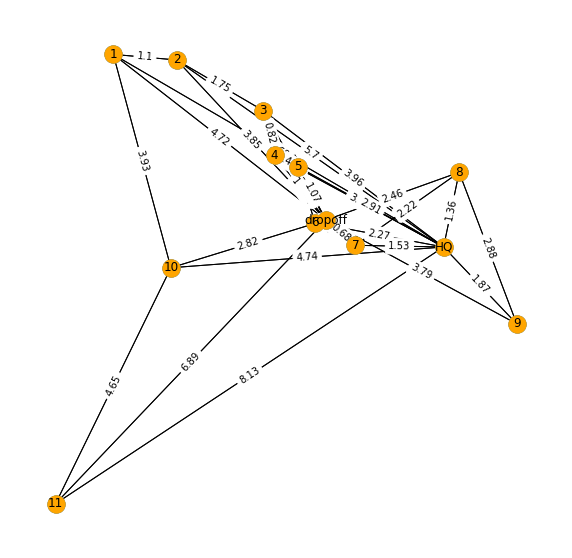

In [34]:
# graph with edges based on shortest route found above

G=nx.Graph()

# node attributes: coordinate position & amount of waste
G.add_node(1, pos = node_1, waste = 0)
G.add_node(2, pos = node_2, waste = 0)
G.add_node(3, pos = node_3, waste = 0)
G.add_node(4, pos = node_4, waste = 0)
G.add_node(5, pos = node_5, waste = 0)
G.add_node(6, pos = node_6, waste = 0)
G.add_node(7, pos = node_7, waste = 0)
G.add_node(8, pos = node_8, waste = 0)
G.add_node(9, pos = node_9, waste = 0)
G.add_node(10, pos = node_10, waste = 0)
G.add_node(11, pos = node_11, waste = 0)
G.add_node('dropoff', pos = dropoff_site, waste = 0)
G.add_node('HQ', pos = HQ, waste = 0)

# re-adjust the edges so that every farm is connected to the drop-off site and HQ
# but only with its previous or following farms within the route
G.add_edge(1, 10, weight = calculate_distance(node_1, node_10))
G.add_edge(2, 1, weight = calculate_distance(node_2, node_1))
G.add_edge(3, 2, weight = calculate_distance(node_3, node_2))
G.add_edge(4, 3, weight = calculate_distance(node_4, node_3))
G.add_edge(5, 4, weight = calculate_distance(node_5, node_4))
G.add_edge(6, 5, weight = calculate_distance(node_6, node_5))
G.add_edge(7, 6, weight = calculate_distance(node_7, node_6))
G.add_edge(8, 7, weight = calculate_distance(node_8, node_7))
G.add_edge(9, 8, weight = calculate_distance(node_9, node_8))
G.add_edge(10, 11, weight = calculate_distance(node_10, node_11))

G.add_edge('dropoff', 1, weight = calculate_distance(dropoff_site, node_1))
G.add_edge('dropoff', 2, weight = calculate_distance(dropoff_site, node_2))
G.add_edge('dropoff', 3, weight = calculate_distance(dropoff_site, node_3))
G.add_edge('dropoff', 4, weight = calculate_distance(dropoff_site, node_4))
G.add_edge('dropoff', 5, weight = calculate_distance(dropoff_site, node_5))
G.add_edge('dropoff', 6, weight = calculate_distance(dropoff_site, node_6))
G.add_edge('dropoff', 7, weight = calculate_distance(dropoff_site, node_7))
G.add_edge('dropoff', 8, weight = calculate_distance(dropoff_site, node_8))
G.add_edge('dropoff', 9, weight = calculate_distance(dropoff_site, node_9))
G.add_edge('dropoff', 10, weight = calculate_distance(dropoff_site, node_10))
G.add_edge('dropoff', 11, weight = calculate_distance(dropoff_site, node_11))

G.add_edge('HQ', 1, weight = calculate_distance(HQ, node_1))
G.add_edge('HQ', 2, weight = calculate_distance(HQ, node_2))
G.add_edge('HQ', 3, weight = calculate_distance(HQ, node_3))
G.add_edge('HQ', 4, weight = calculate_distance(HQ, node_4))
G.add_edge('HQ', 5, weight = calculate_distance(HQ, node_5))
G.add_edge('HQ', 6, weight = calculate_distance(HQ, node_6))
G.add_edge('HQ', 7, weight = calculate_distance(HQ, node_7))
G.add_edge('HQ', 8, weight = calculate_distance(HQ, node_8))
G.add_edge('HQ', 9, weight = calculate_distance(HQ, node_9))
G.add_edge('HQ', 10, weight = calculate_distance(HQ, node_10))
G.add_edge('HQ', 11, weight = calculate_distance(HQ, node_11))

plt.figure(figsize=(10, 10))
pos=nx.get_node_attributes(G, 'pos')
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx(G, pos)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
nx.draw(G, pos, node_color='orange')

In [35]:
class Strategy2:
    """
    This class implements the simulation of the left area of the first strategy.
    """
    
    def __init__(self, big_farms_route, all_farms_route):
        
        # waste production rates for each farm 
        self.node1_waste = get_truncated_normal(mean=54.8, sd=27.4, low=0, upp=109.6)
        self.node2_waste = get_truncated_normal(mean=34.3, sd=17.13, low=0, upp=68.5)
        self.node3_waste = get_truncated_normal(mean=20.6, sd=10.28, low=0, upp=41.1)
        self.node4_waste = get_truncated_normal(mean=17.8, sd=8.91, low=0, upp=35.6)
        self.node5_waste = get_truncated_normal(mean=41.1, sd=20.55, low=0, upp=82.2)
        self.node6_waste = get_truncated_normal(mean=27.4, sd=13.7, low=0, upp=54.8)
        self.node7_waste = get_truncated_normal(mean=438.4, sd=219.2, low=0, upp=876.8)
        self.node8_waste = get_truncated_normal(mean=137, sd=68.5, low=0, upp=274)
        self.node9_waste = get_truncated_normal(mean=1219.3, sd=609.65, low=0, upp=2438.6)
        self.node10_waste = get_truncated_normal(mean=20.6, sd=10.28, low=0, upp=41.1)
        self.node11_waste = get_truncated_normal(mean=68.5, sd=34.25, low=0, upp=137)
        
        self.graph = G # network graph 
        self.day = 0  # keep track of day
        self.fuel_spent = 0 # keep track of fuel spent
        self.fuel_cost = 0 # keep track of how much we spend on fuel
        self.fuel_price_dist = sts.norm(6.13, 0.57) # fuel price distribution
        
        self.truck = Truck(gas_threshold=2.5) # create a truck with a gas threshold of 2.5 gallons
        self.big_farms_route = big_farms_route # [7, 8, 9, HQ]
        self.all_farms_route = all_farms_route # [9, 8, 7, 6, 5, 4, 3, 2, 1, 10, 11, HQ]
    
    def update(self):
        
        # count every day; each update is a daily update
        self.day += 1
        
        # daily fuel price
        self.daily_fuel_price = self.fuel_price_dist.rvs()
        
        # waste is produced every day
        self.graph.nodes[1]['waste'] += self.node1_waste.rvs()
        self.graph.nodes[2]['waste'] += self.node2_waste.rvs()
        self.graph.nodes[3]['waste'] += self.node3_waste.rvs()
        self.graph.nodes[4]['waste'] += self.node4_waste.rvs()
        self.graph.nodes[5]['waste'] += self.node5_waste.rvs()
        self.graph.nodes[6]['waste'] += self.node6_waste.rvs()
        self.graph.nodes[7]['waste'] += self.node7_waste.rvs()
        self.graph.nodes[8]['waste'] += self.node8_waste.rvs()
        self.graph.nodes[9]['waste'] += self.node9_waste.rvs()
        self.graph.nodes[10]['waste'] += self.node10_waste.rvs()
        self.graph.nodes[11]['waste'] += self.node11_waste.rvs()
        
        print(f"----------------DAY {self.day}----------------")
        
        # the truck visits the 3 big farms every 3 days
        # and visits all 11 farms every 24 days
        if self.day % 3 == 0: 
            if self.day % 24 == 0: 
                truck_route = self.all_farms_route
            else:
                truck_route = self.big_farms_route
        
            print(f"Truck is at {self.truck.position}.")
            
            # keep track of the nodes that the truck moves from and to
            # the first node the truck is at is always the company HQ
            truck_visits = ['HQ'] 

            for destination in truck_route: 
                
                self.truck.check_fuel() # gas check
                self.truck.check_capacity() # truck capacity check

                if self.truck.refuel != True: # if the truck does not need to refuel
                    if self.truck.drop_off != True: # and if the truck does not need to drop off waste
                        self.truck.position = destination
                        
                        self.truck.current_capacity += self.graph.nodes[destination]['waste'] # load waste
                        print(f"Truck is collecting waste. Accumulated waste in truck: {self.truck.current_capacity}")
                        self.graph.nodes[destination]['waste'] = 0 # empty waste at farm

                    else: # if the truck needs to drop off waste, go to waste drop-off site
                        print("Truck is dropping off dump.")
                        self.truck.position = 'dropoff'
                        self.truck.current_capacity = 0 # empty waste in truck


                else: # if the truck needs to refuel, go to HQ
                    print("Truck is refueling.")
                    self.truck.position = 'HQ'
                    self.truck.current_fuel = 35 # refuel up to maximum fuel capacity
                    self.fuel_cost += self.daily_fuel_price * 35 # keep track of how much we spend on fuel

                print(f"Truck is at {self.truck.position}")
                truck_visits.append(self.truck.position)

                # keep track of only two nodes: where the truck came from and where the truck is going
                # to calculate the distance the truck moved between these two nodes
                if len(truck_visits) > 2:
                    truck_visits.pop(0) 

                from_node = truck_visits[0] # where the truck came from 
                to_node = truck_visits[1] # where the truck is going
                
                # distance between the two nodes (i.e. how much the truck moved)
                dist = calculate_distance(self.graph.nodes[from_node]['pos'], self.graph.nodes[to_node]['pos'])
                
                self.truck.current_fuel -= fuel_mileage(dist) # subtract gas used
                self.truck.moved_distance += dist # keep track of how much the truck moved in total
                self.fuel_spent += fuel_mileage(dist) # keep track of gas used in total

    def return_moved_distance(self):
        return self.truck.moved_distance
    
    def return_fuel_spent(self):
        return self.fuel_spent
    
    def return_fuel_cost(self):
        return self.fuel_cost

**Test**: Test whether codes work as intended by printing key changes and events.


The test works as expected. Here are some examples:
- the truck visits the 3 big farms every 3 days and all 11 farms every 24 days to collect waste
- the truck visits the drop-off site when the capacity is full
- the truck refuels at HQ when it is out of gas
- the truck returns to HQ as the final destination

In [36]:
# test simulation

# last destination is 'HQ' because it must return to HQ
test_sim = Strategy2([7, 8, 9, 'HQ'], [9, 8, 7, 6, 5, 4, 3, 2, 1, 10, 11, 'HQ']) 
for i in range(100): # results for 100 days
    test_sim.update()

----------------DAY 1----------------
----------------DAY 2----------------
----------------DAY 3----------------
Truck is at HQ.
Truck is collecting waste. Accumulated waste in truck: 1399.0059158432302
Truck is at 7
Truck is collecting waste. Accumulated waste in truck: 1921.5994160590385
Truck is at 8
Truck is collecting waste. Accumulated waste in truck: 6660.098700767074
Truck is at 9
Truck is collecting waste. Accumulated waste in truck: 6660.098700767074
Truck is at HQ
----------------DAY 4----------------
----------------DAY 5----------------
----------------DAY 6----------------
Truck is at HQ.
Truck is collecting waste. Accumulated waste in truck: 8292.729298790606
Truck is at 7
Truck is collecting waste. Accumulated waste in truck: 8745.979981631603
Truck is at 8
Truck is collecting waste. Accumulated waste in truck: 12664.258996544686
Truck is at 9
Truck is collecting waste. Accumulated waste in truck: 12664.258996544686
Truck is at HQ
----------------DAY 7----------------


**Results**: 500 simulation trials of truck operation for 1 year

In [37]:
n_trials = 500

strat2_distance_results = []
strat2_fuel_spent_results = []
strat2_fuel_cost_results = []

for i in range(n_trials):
    # last destination is 'HQ' because it must return to HQ
    sim = Strategy2([7, 8, 9, 'HQ'], [9, 8, 7, 6, 5, 4, 3, 2, 1, 10, 11, 'HQ'])  
    for j in range(365): # results for one year
        with HiddenPrints(): # disable printing
            sim.update()
    strat2_distance_results.append(sim.return_moved_distance())
    strat2_fuel_spent_results.append(sim.return_fuel_spent())
    strat2_fuel_cost_results.append(sim.return_fuel_cost())

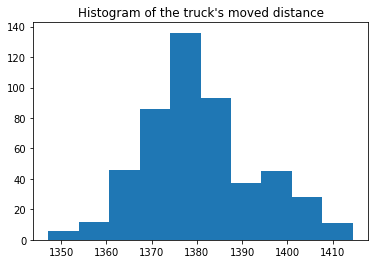

Average moved distance per year: 1380.572
95% confidence interval: [1379.483, 1381.662]


In [38]:
# the distance the truck moved
plt.hist(strat2_distance_results)
plt.title("Histogram of the truck's moved distance")
plt.show()
print(f"Average moved distance per year: {np.round(np.mean(strat2_distance_results), 3)}")
print(f"95% confidence interval: {confidence_interval(strat2_distance_results)}")

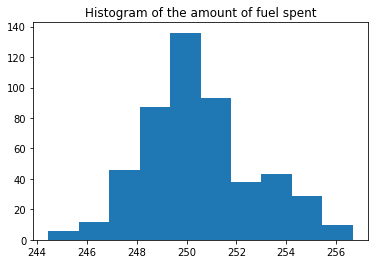

Average fuel spent per year: 250.511
95% confidence interval: [250.313, 250.709]


In [39]:
# the amount of fuel spent by the truck (proportional to the distance moved)
plt.hist(strat2_fuel_spent_results)
plt.title("Histogram of the amount of fuel spent")
plt.show()
print(f"Average fuel spent per year: {np.round(np.mean(strat2_fuel_spent_results), 3)}")
print(f"95% confidence interval: {confidence_interval(strat2_fuel_spent_results)}")

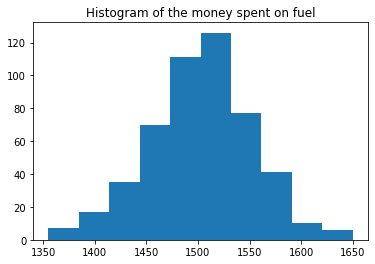

Average money spent on fuel per year: 1503.116
95% confidence interval: [1498.685, 1507.547]


In [40]:
# the amount of money spent on fuel
plt.hist(strat2_fuel_cost_results)
plt.title("Histogram of the money spent on fuel")
plt.show()
print(f"Average money spent on fuel per year: {np.round(np.mean(strat2_fuel_cost_results), 3)}")
print(f"95% confidence interval: {confidence_interval(strat2_fuel_cost_results)}")

## References


- https://progr.interplanety.org/en/python-how-to-find-the-polygon-center-coordinates/

- https://stackoverflow.com/questions/36894191/how-to-get-a-normal-distribution-within-a-range-in-numpy

- https://stackoverflow.com/questions/8391411/how-to-block-calls-to-print